In [1]:
from qiskit import *

In [2]:
n = 3
secret_number = '111'

simon = QuantumCircuit(n*2, n)

In [3]:
simon.h(range(n))
simon.barrier()

In [4]:
# setting up XOR

simon.cx(range(n), range(n,n*2))
simon.barrier()

In [5]:
# setting up f(x)
# can be arbitary trasnformation
# but should satisfy the f(x) = f(x + s) condition

simon.cx(1,4)
simon.cx(1,5)

simon.barrier()

In [6]:
simon.h(range(n))
simon.measure(range(n), range(n))

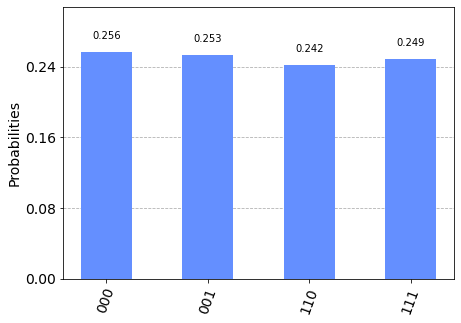

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(simon, backend=simulator).result()
counts = result.get_counts(simon)

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

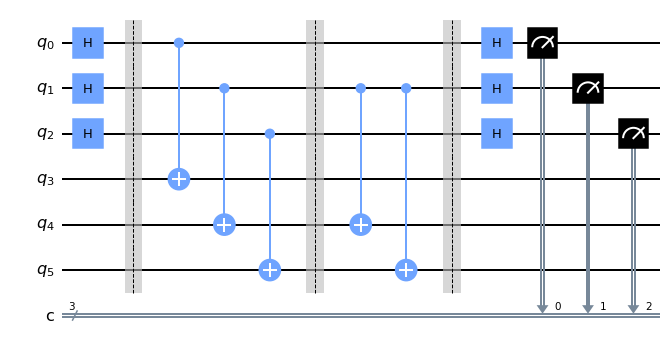

In [8]:
simon.draw(output='mpl')

In [9]:
# reconstructung y
import numpy as np
import random

y = np.array(list(counts.keys()))
print(f'Y is a vector with trivial 000 solution: {y}')

# now construction a matrix
Y = []

for elem in y:
    if elem in ('000'):
        continue
    t = []
    for bit in elem:
        t.append(int(bit))
    Y.append(t)
Y = random.sample(Y, 2)
print(f'Y matrix is: {Y}')


# solving linear equation
C = np.zeros(2, dtype='int')
print(f'C: {C}')

# cannot figure out how to solve further

Y is a vector with trivial 000 solution: ['110' '111' '001' '000']
Y matrix is: [[1, 1, 0], [0, 0, 1]]
C: [0 0]
